# **Hand Written Digit Prediction - Classification Analysis**




-------------

## **Objective**

The main objective is to predict the handwritten digit using machine learning, Python.

## **Data Source**

The data source is from Python

## **Import Library**

In [154]:
import pandas as pd

In [155]:
import numpy as np

In [156]:
import matplotlib.pyplot as plt

## **Import Data**

In [157]:
from sklearn.datasets import load_digits

In [158]:
df = load_digits()

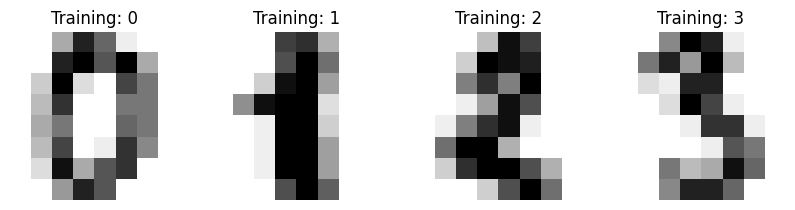

In [159]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10 ,3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training: %i" % label)


## **Describe Data**

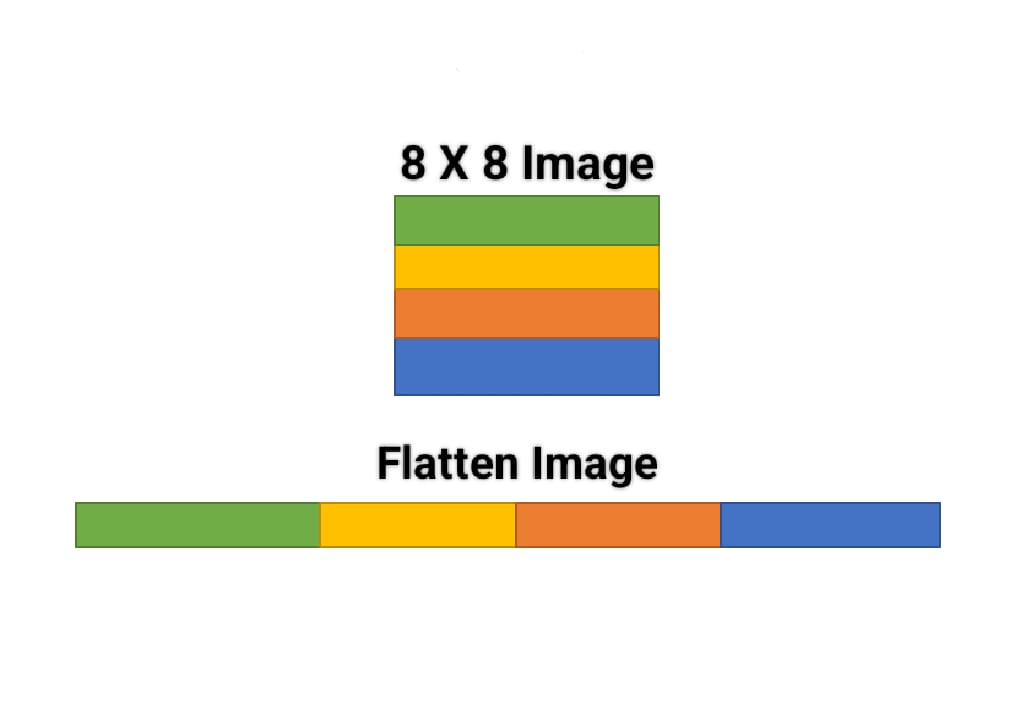

In [160]:
df.images.shape

(1797, 8, 8)

In [161]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [162]:
df.images[0].shape

(8, 8)

In [163]:
len(df.images)

1797

In [164]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [165]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [166]:
data[0].shape

(64,)

In [167]:
data.shape

(1797, 64)

## **Scaling Image Data**





In [168]:
data.min()

0.0

In [169]:
data.max()

16.0

In [170]:
data = data/16

In [171]:
data.min()

0.0

In [172]:
data.max()

1.0

In [173]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

## **Train Test Split**

In [174]:
from sklearn.model_selection import train_test_split

In [175]:
X_train,X_test,y_train,y_test = train_test_split(data, df.target, test_size=.3)

In [176]:
X_train.shape ,_test.shape ,y_train.shape ,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

## **Random Forest Model**

In [177]:
from sklearn.ensemble import RandomForestClassifier

In [178]:
rf = RandomForestClassifier()

In [179]:
rf.fit(X_train, y_train)

RandomForestClassifier()

## **Predict Test data**

In [180]:
y_pred = rf.predict(X_test)

In [181]:
y_pred

array([6, 1, 9, 9, 6, 4, 2, 9, 4, 3, 4, 6, 5, 2, 6, 5, 6, 0, 6, 9, 3, 5,
       2, 3, 6, 4, 6, 2, 8, 4, 2, 2, 9, 9, 5, 0, 1, 7, 9, 4, 4, 7, 5, 6,
       2, 1, 2, 6, 9, 4, 5, 5, 0, 1, 6, 2, 3, 1, 7, 6, 4, 8, 6, 4, 2, 7,
       0, 0, 0, 0, 0, 9, 3, 6, 0, 2, 5, 3, 4, 7, 1, 8, 6, 6, 5, 1, 4, 9,
       3, 8, 2, 3, 5, 0, 4, 1, 1, 4, 6, 2, 9, 7, 7, 1, 6, 3, 5, 9, 2, 3,
       4, 6, 3, 4, 0, 9, 1, 3, 1, 4, 2, 7, 0, 5, 1, 1, 2, 8, 6, 7, 3, 2,
       1, 3, 5, 9, 8, 9, 0, 0, 1, 5, 5, 1, 9, 5, 9, 4, 9, 4, 0, 1, 2, 8,
       7, 1, 5, 5, 4, 4, 1, 0, 5, 9, 7, 9, 9, 7, 6, 4, 5, 9, 0, 5, 6, 0,
       6, 5, 2, 3, 2, 1, 0, 4, 0, 5, 0, 2, 7, 4, 9, 6, 1, 6, 2, 9, 4, 5,
       1, 5, 9, 7, 4, 8, 6, 5, 9, 6, 8, 9, 2, 9, 3, 3, 1, 2, 0, 3, 6, 0,
       3, 0, 6, 4, 9, 9, 1, 5, 3, 7, 2, 7, 5, 2, 9, 4, 0, 5, 8, 8, 4, 0,
       7, 6, 2, 8, 8, 6, 8, 0, 3, 2, 3, 8, 5, 6, 7, 8, 2, 2, 9, 2, 5, 4,
       3, 6, 9, 3, 5, 7, 8, 3, 0, 4, 4, 3, 6, 0, 0, 6, 4, 1, 2, 6, 5, 0,
       8, 2, 0, 4, 1, 8, 4, 7, 9, 9, 5, 3, 0, 1, 0,

## **Model Accuracy**

In [182]:
from sklearn.metrics import confusion_matrix, classification_report


In [183]:
confusion_matrix(y_test, y_pred)

array([[48,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 46,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 55,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 58,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 61,  1,  0,  0,  1],
       [ 1,  0,  0,  0,  0,  0, 60,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  1, 39,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 58]])

In [184]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        50
           1       0.96      1.00      0.98        50
           2       0.98      1.00      0.99        46
           3       1.00      1.00      1.00        55
           4       0.97      0.98      0.97        59
           5       1.00      0.97      0.98        63
           6       0.98      0.98      0.98        61
           7       0.96      1.00      0.98        54
           8       1.00      0.89      0.94        44
           9       0.97      1.00      0.98        58

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

